# More on Integration

Most of the content of this notebook is from

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

Chapter 8

I changed and tested the code, so you will find differences from the original work of Mr. Johansson

In [1]:
import numpy as np
from scipy import integrate
import sympy

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Symbolic Integration

In [2]:
sympy.init_printing()

In [4]:
xy = sympy.symbols("x")
f = 2*xy
print (sympy.integrate(f,(xy)))

f = 2*(xy-1)**2
print (sympy.integrate(f,(xy)))


f = sympy.exp(-xy)/(1+sympy.exp(-xy))**2
print (sympy.integrate(f,(xy)))

x**2
2*x**3/3 - 2*x**2 + 2*x
1/(1 + exp(-x))


## Simpson's rule and other rules

In [6]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [7]:
#x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a+b)/2, b              # simpson's rule
#x = a, b                       # trapezoid rule
#x = ((b+a)/2,)                 # mid-point rule
print (x)

(a, a/2 + b/2, b)


In [8]:
w = [sympy.symbols("w_%d" % i) for i in range(len(x))] 
print (w)

[w_0, w_1, w_2]


In [9]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])

In [10]:
print (q_rule)

w_0*f(a) + w_1*f(a/2 + b/2) + w_2*f(b)


In [11]:
for n in range(len(x)):
    print (n)

0
1
2


In [12]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]
print (phi)

[Lambda(x, 1), Lambda(_x, _x), Lambda(x, x**2)]


In [13]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

In [14]:
print (eqs)

[a - b + w_0 + w_1 + w_2, a**2/2 + a*w_0 - b**2/2 + b*w_2 + w_1*(a/2 + b/2), a**3/3 + a**2*w_0 - b**3/3 + b**2*w_2 + w_1*(a/2 + b/2)**2]


In [15]:
eqsDom = [q_rule.subs(f, phi[n]) for n in range(len(phi))]
print (eqsDom)

[w_0 + w_1 + w_2, a*w_0 + b*w_2 + w_1*(a/2 + b/2), a**2*w_0 + b**2*w_2 + w_1*(a/2 + b/2)**2]


In [16]:
print (f(0))
print (f(1))

print (q_rule.subs(f, 0)) #this means nothing as 0 is not a symbol 
print (q_rule.subs(f, 1)) #this means nothing as 1 is not a symbol
print (q_rule.subs(f, phi[0])) #this means as phi[0] is 1

f(0)
f(1)
w_0*f(a) + w_1*f(a/2 + b/2) + w_2*f(b)
w_0*f(a) + w_1*f(a/2 + b/2) + w_2*f(b)
w_0 + w_1 + w_2


In [17]:
[sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

In [18]:
w_sol = sympy.solve(eqs, w)

In [19]:
print (w_sol)

{w_0: -a/6 + b/6, w_1: -2*a/3 + 2*b/3, w_2: -a/6 + b/6}


In [20]:
print( q_rule.subs(w_sol).simplify())

-(a - b)*(f(a) + f(b) + 4*f(a/2 + b/2))/6


## SciPy `integrate`

### Derivatives and Integration examples of Gaussian Normal and Gamma Functions

In [50]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

dx = 0.0001
print (" Numerical 2nd derivative of the cumulative Distribution Function ")
print ((f(x+dx)+f(x-dx) - 2*f(x))/(dx*dx))

xx     = Symbol('xx')
y      = sympy.exp(-xx**2/2)/sympy.sqrt(2*pi)
yprime = y.diff(xx)
ff     = lambdify(xx, yprime)
print (" Analytical 1st derivative of the cumulative Distribution Function using sympy.diff and lambdify ")
print (ff(x))

 Numerical 2nd derivative of the cumulative Distribution Function 
0.035454787369881835
 Analytical 1st derivative of the cumulative Distribution Function using sympy.diff and lambdify 
-0.01329554523581403


In [51]:
print (" Central difference of the density Function ")
a = (f(x+dx) - f(x-dx))
b = (2.0*dx)
print (a/b)

 Central difference of the density Function 
-0.013295545368795236


In [64]:
from math import sin, pi, exp, gamma
from scipy import integrate
def gammadom(t):
    def g(x):
        return exp(-x)*x**(t-1)
    result = integrate.quad(g, 0, np.inf)[0]
    return round(result, 10)

print (gammadom(3))
print (gamma(3))

x  = 3.0
print (gammadom(x))
print (gamma(x))

print (" derivatives ")
dx = 0.0001

a = (gammadom(x)-gammadom(x-dx))
print (a/dx)
a =  (gammadom(x+dx)-gammadom(x-dx))
print (a/(2.0*dx))

a = (gamma(x)-gamma(x-dx))
print (a/dx)

a = (gamma(x + dx)-gamma(x-dx))

print (a/(2.0*dx))

2.0
2.0
2.0
2.0
 derivatives 
1.8454439999993077
1.845568499999617
1.8454440294513041
1.8455686759499823


In [65]:
def f(x):
    return np.exp(-x**2)

In [66]:
val, err = integrate.quad(f, -1, 1)
print (val)
print (err)

1.493648265624854
1.6582826951881447e-14


In [67]:
val, err = integrate.quadrature(f, -1, 1)
print (val)
print (err)

1.4936482656450039
7.459897144457273e-10


In [68]:
from sympy import *
import numpy as np
import math

xx = Symbol('xx')

y = exp(-xx**2/2)/sqrt(2*pi)
yprime = y.diff(xx)

f = lambdify(xx, yprime, 'numpy')
# derivative of the density at different x's
print (f(np.ones(5)))
for i in range(5):
    print (f(i))

[-0.24197072 -0.24197072 -0.24197072 -0.24197072 -0.24197072]
-0.0
-0.2419707245191434
-0.10798193302637614
-0.013295545235814023
-0.0005353209030595416


## Extra arguments

In [69]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

In [70]:
from scipy import integrate
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))
print (val)
print (err)

val, err = integrate.quadrature(f, -1, 1, args=(1, 2, 3))
print (val)
print (err)

1.2763068351022229
1.4169852348169507e-14
1.2763068351036782
3.169002837921653e-10


## Reshuffle arguments

In [71]:
from scipy.special import jv

In [72]:
from scipy import integrate
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)
print (val)
print (err)

0.7153119177847678
2.47260738289741e-14


## Infinite limits 

In [73]:
f  = lambda x: np.exp(-(x**2)/2.0)/sqrt(2.0*pi)
f2 = lambda x: np.exp(-(x**2)/2.0)

In [75]:
val, err = integrate.quad(f, -np.inf, np.inf)
print (val)
print (err)

val, err = integrate.quad(f2, -np.inf, np.inf)
print (val)
print (np.sqrt(2.0*np.pi))


0.9999999999999997
1.0178191503494656e-08
2.5066282746309994
2.5066282746310002


## Singularity

In [80]:
f = lambda x: 1/np.sqrt(abs(x))

In [81]:
a, b = -1, 1

In [82]:
integrate.quad(f, a, b)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [83]:
val, err = integrate.quad(f, a, b, points=[0])
print (val)
print (err)

3.999999999999999
1.7319479184152442e-14


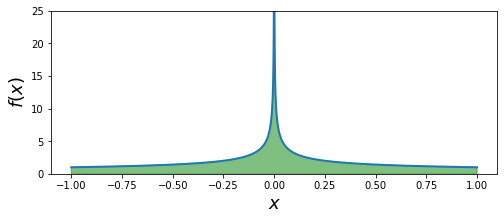

In [85]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)

#fig.tight_layout()
#fig.savefig("pdf_files\diverging-integrand.pdf")

## Tabulated integrand
with integrate.trapz(y, x), integrate.simps(y, x), integrate.romb(y, dx=(x[1]-x[0])) and integrate.simps(y, dx=(x[1]-x[0]))

In [86]:
f = lambda x: np.sqrt(x)

In [87]:
a, b = 0, 2

In [88]:
x = np.linspace(a, b, 25)

In [89]:
y = f(x)

Text(0, 0.5, '$f(x)$')

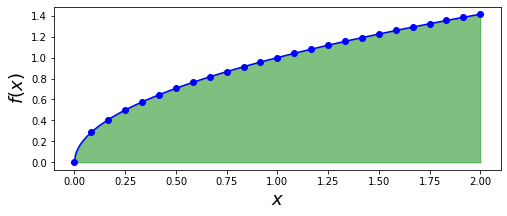

In [90]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

In [91]:
val_trapz = integrate.trapz(y, x)
print (val_trapz)

1.8808217160508505


In [92]:
val_simps = integrate.simps(y, x)
print (val_simps)

1.883665102448715


In [93]:
# and this the exact-analytical result
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)

In [94]:
print (val_exact)

1.8856180831641267


In [95]:
print (val_exact - val_trapz)

0.004796367113276245


In [96]:
print (val_exact - val_simps)

0.001952980715411723


In [97]:
x = np.linspace(a, b, 1 + 2**6)

In [98]:
print (len(x))

65


In [99]:
y = f(x)

In [100]:
print (val_trapz)
print (val_simps)
print (integrate.romb(y, dx=(x[1]-x[0])))
print (integrate.simps(y, dx=x[1]-x[0]))
print (val_exact - integrate.simps(y, dx=x[1]-x[0]))
print (val_exact - integrate.romb(y, dx=(x[1]-x[0])))

1.8808217160508505
1.883665102448715
1.8852392847412136
1.8851695976099685
0.0004484855541582178
0.00037879842291310695


In [101]:
from scipy import interpolate
def runge(x):
    return 1/(1 + 25 * x**2)

x = np.linspace(-1, 1, 11)
y = runge(x)
f = interpolate.interp1d(x, y, kind=3)
xx = np.linspace(-1, 1, 100)
print (integrate.simps(f(x), x))
print (integrate.simps(f(xx), xx))
print (integrate.simps(runge(x), x))
print (integrate.simps(runge(xx), xx))
val, err = integrate.quad(runge, -1, 1)
print (val)

0.5698340874811464
0.5519675161058003
0.5698340874811464
0.549360455512869
0.5493603067780066


## Higher dimension
with dblquad, the intervals of integration must be passed as a lambda function

In [102]:
def f(x):
    return np.exp(-x**2)

In [103]:
a, b = 0, 2
%time integrate.quad(f, a, b)

Wall time: 0 ns


In [104]:
def f(x, y):
    return np.exp(-x**2-y**2)

In [105]:
a, b = 0, 1

In [106]:
g = lambda x: 0

In [107]:
h = lambda x: 1

In [108]:
print (integrate.dblquad(f, a, b, g, h))

(0.5577462853510337, 8.291374381535408e-15)


In [109]:
print (integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1))

(0.5577462853510337, 8.291374381535408e-15)


'fig.tight_layout()\nfig.savefig("pdf_files\\multi-dim-integrand.pdf")'

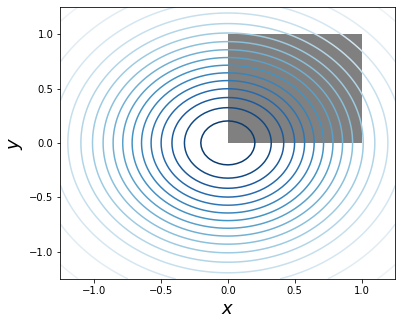

In [110]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y  = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")
ax.add_patch(bound_rect)

ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

'''fig.tight_layout()
fig.savefig("pdf_files\multi-dim-integrand.pdf")'''

In [111]:
print (integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x))

(0.7320931000008094, 1.6564972931774035e-14)


### nquad and tplquad

In [124]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

In [125]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

In [126]:
print (integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1))

(0.4165383858866382, 8.291335287314424e-15)


In [127]:
print (integrate.nquad(f, [(0, 1), (0, 1), (0, 1)]))

(0.4165383858866382, 8.291335287314424e-15)


In [115]:
print ([(0,1)] * 1)
print ([(0,1)] * 2)
print ([(0,1)] * 3)

[(0, 1)]
[(0, 1), (0, 1)]
[(0, 1), (0, 1), (0, 1)]


In [116]:
%time integrate.nquad(f, [(0,1)] * 1)

Wall time: 0 ns


In [117]:
%time integrate.nquad(f, [(0,1)] * 2)

Wall time: 7.18 ms


In [118]:
%time integrate.nquad(f, [(0,1)] * 3)

Wall time: 100 ms


In [119]:
%time integrate.nquad(f, [(0,1)] * 4)

Wall time: 1.68 s


In [120]:
%time integrate.nquad(f, [(0,1)] * 5)

Wall time: 35.4 s


## Monte Carlo integration

In [130]:
from skmonaco import mcquad

In [ ]:
%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)

In [ ]:
val, err

In [ ]:
%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)

In [ ]:
val, err

## Symbolic Integrals

### single integrals

In [131]:
x = sympy.symbols("x")

In [132]:
f = 2 * sympy.sqrt(1-x**2)

In [133]:
a, b = -1, 1

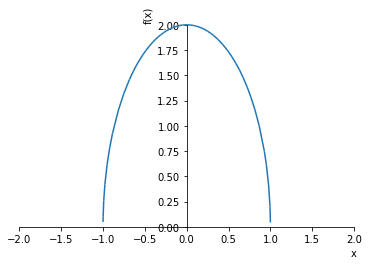

In [134]:
sympy.plot(f, (x, -2, 2));

In [135]:
val_sym = sympy.integrate(f, (x, a, b))
print (val_sym)

pi


In [137]:
# integrating with "sympy.mpmath.quad"
sympy.mpmath.mp.dps = 75
f_mpmath = sympy.lambdify(x, f, 'mpmath')
val = sympy.mpmath.quad(f_mpmath, (a, b))
print (sympy.sympify(val))

In [42]:
print sympy.N(val_sym, sympy.mpmath.mp.dps+1) - val

6.908934844075555700309081490240319656892800291549025108018962776134873442530e-77


In [138]:
# integrating with "integrate.quad"
f_numpy = sympy.lambdify(x, f, 'numpy')
print (integrate.quad(f_numpy, a, b)[0])

3.141592653589797


In [140]:
%timeit sympy.mpmath.quad(f_mpmath, [a, b])
%timeit integrate.quad(f_numpy, a, b)

### double and triple integrals

In [ ]:
def f2(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f3(x, y, z):
    return np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-x**2-y**2-z**2)

In [ ]:
print integrate.dblquad(f2, 0, 1, lambda x : 0, lambda x : 1)

In [ ]:
print integrate.tplquad(f3, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [ ]:
x, y, z = sympy.symbols("x, y, z")

In [ ]:
f2 = sympy.cos(x)*sympy.cos(y)*sympy.exp(-x**2-y**2)
f3 = sympy.cos(x)*sympy.cos(y)*sympy.cos(z)*sympy.exp(-x**2 - y**2 - z**2)

In [ ]:
f2_numpy = sympy.lambdify((x, y), f2, 'numpy')
f3_numpy = sympy.lambdify((x, y, z), f3, 'numpy')

In [ ]:
print integrate.dblquad(f2_numpy, 0, 1, lambda x: 0, lambda x: 1)
print integrate.tplquad(f3_numpy, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [ ]:
sympy.mpmath.mp.dps = 30

In [ ]:
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')
sympy.mpmath.quad(f2_mpmath, (0, 1), (0, 1))

In [ ]:
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')
res = sympy.mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))
print sympy.sympify(res)

## Line integrals

In [141]:
t, x, y = sympy.symbols("t, x, y")

In [142]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [143]:
print (sympy.line_integrate(1, C, [x, y]))

2*pi


In [144]:
print (sympy.line_integrate(x**2 * y**2, C, [x, y]))

pi/4


## Integral transformations

### Laplace transforms

In [145]:
s = sympy.symbols("s")

In [146]:
a, t = sympy.symbols("a, t", positive=True)

In [147]:
f = sympy.sin(a*t)

In [148]:
sympy.laplace_transform(f, t, s)

In [149]:
F = sympy.laplace_transform(f, t, s, noconds=True)

In [150]:
F

In [151]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

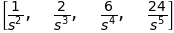

In [152]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [154]:
n = sympy.symbols("n", integer=True, positive=True)

In [155]:
sympy.laplace_transform(t**n, t, s, noconds=True)

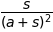

In [156]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

### Fourier Transforms

In [157]:
w = sympy.symbols("omega")

In [158]:
f = sympy.exp(-a*t**2)

In [159]:
help(sympy.fourier_transform)

Help on function fourier_transform in module sympy.integrals.transforms:

fourier_transform(f, x, k, **hints)
    Compute the unitary, ordinary-frequency Fourier transform of `f`, defined
    as
    
    .. math:: F(k) = \int_{-\infty}^\infty f(x) e^{-2\pi i x k} \mathrm{d} x.
    
    If the transform cannot be computed in closed form, this
    function returns an unevaluated :class:`FourierTransform` object.
    
    For other Fourier transform conventions, see the function
    :func:`sympy.integrals.transforms._fourier_transform`.
    
    For a description of possible hints, refer to the docstring of
    :func:`sympy.integrals.transforms.IntegralTransform.doit`.
    Note that for this transform, by default ``noconds=True``.
    
    >>> from sympy import fourier_transform, exp
    >>> from sympy.abc import x, k
    >>> fourier_transform(exp(-x**2), x, k)
    sqrt(pi)*exp(-pi**2*k**2)
    >>> fourier_transform(exp(-x**2), x, k, noconds=False)
    (sqrt(pi)*exp(-pi**2*k**2), True)
  

In [161]:
F = sympy.fourier_transform(f, t, w)

In [162]:
F

In [163]:
sympy.inverse_fourier_transform(F, w, t)